<a href="https://colab.research.google.com/github/NguyenSLam/Report_for_homework_Artificial-Intelligence-/blob/main/10VietnameseDishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
folder = '/content/drive/MyDrive/AI_Picture/Dishes_Data/Train/'
photos, labels = list(), list()
for file in os.listdir(folder):
    output = 0.0
    if file.startswith('banh_bo'):
        output = 1.0
    if file.startswith('banh_bot_loc'):
        output = 2.0
    if file.startswith('banh_trung_thu'):
        output = 3.0
    if file.startswith('banh_cong'):
        output = 4.0
    if file.startswith('banh_da_lon'):
        output = 5.0
    if file.startswith('banh_khot'):
        output = 6.0
    if file.startswith('banh_tai_heo'):
        output = 7.0 
    if file.startswith('BanhMi'):
        output = 8.0
    if file.startswith('banh_tieu'):
        output = 9.0  
    if file.startswith('banh_xeo'):
        output = 10.0
    if output != 0.0:                    
        photo = load_img(folder + file, target_size=(200, 200, 3))
        photo = img_to_array(photo)
        photos.append(photo)
        labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/AI/Backup_AI/10VietnameseDishes_photos', photos)
save('/content/drive/MyDrive/Colab Notebooks/AI/Backup_AI/10VietnameseDishes_labels', labels)

(2865, 200, 200, 3) (2865,)


In [ ]:
#chia 10% dữ liệu cho tập kiểm tra và 90% còn lại cho tập huấn luyện.
split_index = int(0.1 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]
print(train_x.shape, test_x.shape)

(2579, 200, 200, 3) (286, 200, 200, 3)


In [ ]:
#về khoảng giá trị từ 0 đến 1 bằng cách chia tất cả các giá trị pixel cho 255
train_x = train_x.reshape((2579, 200, 200, 3))
train_x = train_x.astype('float32')/255
test_x = test_x.reshape((286, 200, 200, 3))
test_x = test_x.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,11)
test_y = to_categorical(test_y,11)

In [ ]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)
     

(2579, 200, 200, 3)
(286, 200, 200, 3)
(2579, 11)
(286, 11)


In [ ]:
# khai báo các thành phần cần thiết để xây dựng một mô hình mạng neural 
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam,SGD  
from keras import losses
loss = losses
batch_size = 64
epochs = 40
classes = 11

In [ ]:
# khởi tạo một mô hình mạng neural convolutional (CNN) 
from keras.layers import LeakyReLU
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(200,200,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                  

In [ ]:
#Compile:
from keras.losses import categorical_crossentropy
sgd = SGD(lr = 0.001, decay = 1e-6, momentum = 0.9, nesterov= True)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)
#Đoạn code này đánh giá độ chính xác của mô hình
test_loss, test_acc = model.evaluate(train_x, train_y)
print('Mất mát:',test_loss)
print('Độ chính xác',test_acc)

Epoch 1/40
41/41 [==============================] - 5s 92ms/step - loss: 2.3120 - accuracy: 0.1194
Epoch 2/40
41/41 [==============================] - 4s 93ms/step - loss: 2.2440 - accuracy: 0.1652
Epoch 3/40
41/41 [==============================] - 4s 98ms/step - loss: 2.1755 - accuracy: 0.2284
Epoch 4/40
41/41 [==============================] - 4s 104ms/step - loss: 2.0613 - accuracy: 0.2931
Epoch 5/40
41/41 [==============================] - 4s 92ms/step - loss: 1.9255 - accuracy: 0.3327
Epoch 6/40
41/41 [==============================] - 4s 96ms/step - loss: 1.8054 - accuracy: 0.3808
Epoch 7/40
41/41 [==============================] - 4s 92ms/step - loss: 1.7248 - accuracy: 0.4145
Epoch 8/40
41/41 [==============================] - 4s 98ms/step - loss: 1.6713 - accuracy: 0.4327
Epoch 9/40
41/41 [==============================] - 4s 108ms/step - loss: 1.5985 - accuracy: 0.4506
Epoch 10/40
41/41 [==============================] - 4s 106ms/step - loss: 1.5427 - accuracy: 0.4800
Epoch 

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Data/10VietnameseDishes.h5')

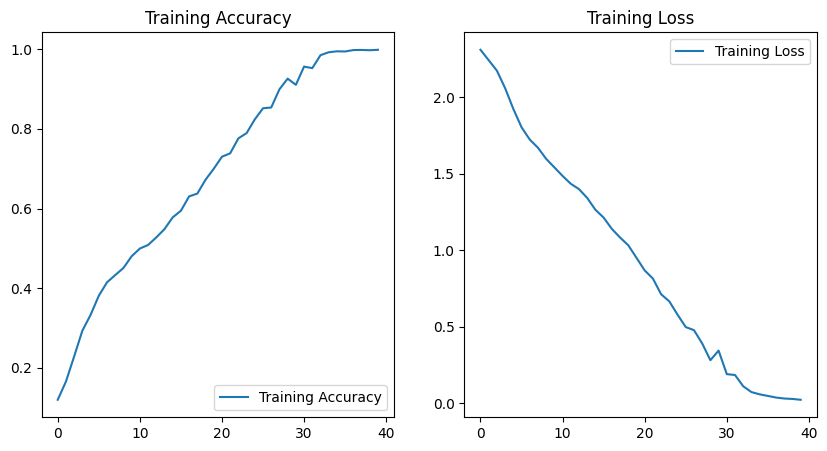

In [ ]:
# Vẽ biểu đồ độ chính xác và độ mất mát của mô hình trong quá trình huấn luyện
acc = train.history['accuracy']
loss = train.history['loss']
epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()


In [ ]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model
model=load_model("/content/drive/MyDrive/Colab Notebooks/Data/10VietnameseDishes.h5")


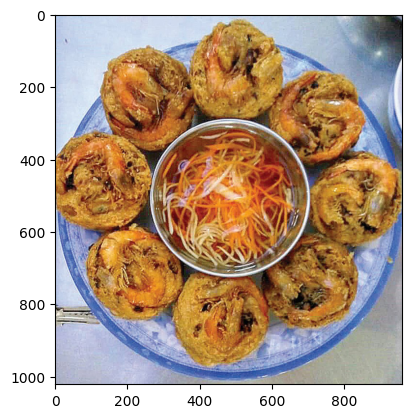

1/1 [==============================] - 0s 73ms/step
Món này là  banh_cong [1.0400708e-14 1.7565360e-03 3.8864211e-05 2.1122459e-04 9.9610966e-01
 4.7134375e-08 3.4872787e-07 6.3562809e-05 2.2257504e-06 1.8129703e-03
 4.6062669e-06]
0.99610966


In [ ]:
class_name = ["","banh_bo","banh_bot_loc","banh_trung_thu","banh_cong","banh_da_lon","banh_khot","banh_tai_heo","BanhMi","banh_tieu","banh_xeo"]
img1=load_img('/content/drive/MyDrive/AI_Picture/Dishes_Data/Test/banh_cong19.jpg')
plt.imshow(img1)
plt.show()
img1=load_img('/content/drive/MyDrive/AI_Picture/Dishes_Data/Test/banh_cong19.jpg',target_size=(200,200))
img1=img_to_array(img1)
img1=img1.reshape(1,200,200,3)
img1=img1.astype('float32')
img1=img1/255
predict=model.predict(img1)
print("Món này là ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))


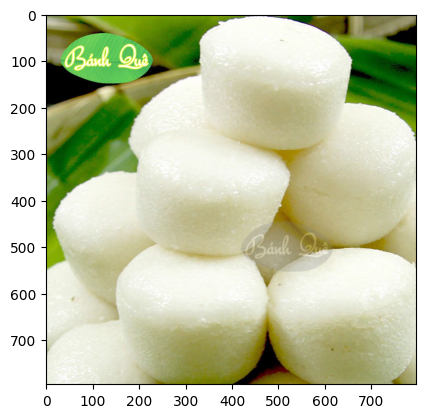

1/1 [==============================] - 0s 35ms/step
Món này là  banh_bo [2.2407512e-18 9.9976772e-01 4.7486537e-05 9.9762648e-05 3.0216535e-07
 3.9869246e-05 5.3102116e-07 4.1187162e-05 1.2787026e-08 4.0342363e-07
 2.7236617e-06]
0.9997677


In [ ]:
class_name = ["","banh_bo","banh_bot_loc","banh_trung_thu","banh_cong","banh_da_lon","banh_khot","banh_tai_heo","BanhMi","banh_tieu","banh_xeo"]
img2=load_img('/content/drive/MyDrive/AI_Picture/Dishes_Data/Test/banh_bo88.jpg')
plt.imshow(img2)
plt.show()
img2=load_img('/content/drive/MyDrive/AI_Picture/Dishes_Data/Test/banh_bo88.jpg',target_size=(200,200))
img2=img_to_array(img2)
img2=img2.reshape(1,200,200,3)
img2=img2.astype('float32')
img2=img2/255
predict=model.predict(img2)
print("Món này là ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))

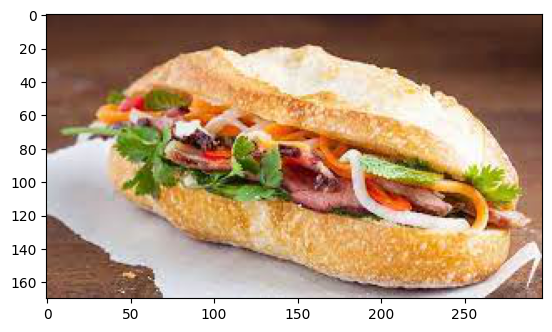

1/1 [==============================] - 0s 19ms/step
Món này là  BanhMi [2.0041964e-17 7.0922438e-06 1.2677481e-02 5.8564052e-07 3.9391917e-08
 3.4579472e-08 7.2693624e-06 2.2178991e-08 9.8730624e-01 1.1987684e-06
 8.7611056e-09]
0.98730624


In [ ]:
class_name = ["","banh_bo","banh_bot_loc","banh_trung_thu","banh_cong","banh_da_lon","banh_khot","banh_tai_heo","BanhMi","banh_tieu","banh_xeo"]
img3=load_img('/content/drive/MyDrive/AI_Picture/Dishes_Data/Test/BanhMi21.jpeg')
plt.imshow(img3)
plt.show()
img3=load_img('/content/drive/MyDrive/AI_Picture/Dishes_Data/Test/BanhMi21.jpeg',target_size=(200,200))
img3=img_to_array(img3)
img3=img3.reshape(1,200,200,3)
img3=img3.astype('float32')
img3=img3/255
predict=model.predict(img3)
print("Món này là ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))

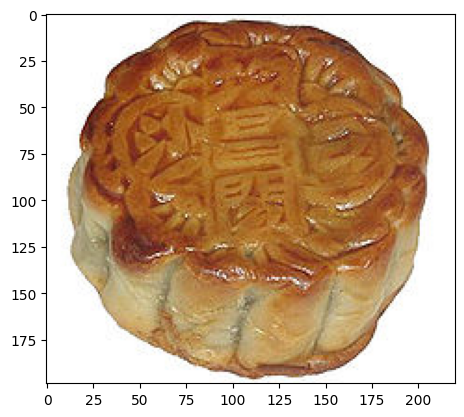

1/1 [==============================] - 0s 126ms/step
Món này là  banh_trung_thu [3.0430045e-13 1.1833791e-02 2.3118932e-06 9.8489076e-01 4.9775740e-04
 2.8779623e-05 7.6056663e-09 1.4020732e-03 1.4389691e-09 1.3444083e-03
 8.5367816e-08]
0.98489076


In [ ]:
class_name = ["","banh_bo","banh_bot_loc","banh_trung_thu","banh_cong","banh_da_lon","banh_khot","banh_tai_heo","BanhMi","banh_tieu","banh_xeo"]
img4=load_img('/content/drive/MyDrive/AI_Picture/Dishes_Data/Test/banh_trung_thu8.jpg')
plt.imshow(img4)
plt.show()
img4=load_img('/content/drive/MyDrive/AI_Picture/Dishes_Data/Test/banh_trung_thu8.jpg',target_size=(200,200))
img4=img_to_array(img4)
img4=img4.reshape(1,200,200,3)
img4=img4.astype('float32')
img4=img4/255
predict=model.predict(img4)
print("Món này là ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))

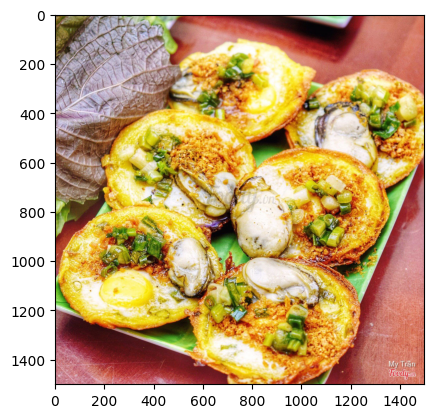

1/1 [==============================] - 0s 20ms/step
Món này là  banh_khot [6.7683670e-17 2.9714865e-04 2.4084596e-07 7.6430837e-07 1.0219600e-06
 9.2854891e-05 9.9350834e-01 1.7707533e-06 4.0225401e-05 3.2446867e-06
 6.0544168e-03]
0.99350834


In [ ]:
class_name = ["","banh_bo","banh_bot_loc","banh_trung_thu","banh_cong","banh_da_lon","banh_khot","banh_tai_heo","BanhMi","banh_tieu","banh_xeo"]
img5=load_img('/content/drive/MyDrive/AI_Picture/Dishes_Data/Test/banh_khot3.jpg')
plt.imshow(img5)
plt.show()
img5=load_img('/content/drive/MyDrive/AI_Picture/Dishes_Data/Test/banh_khot3.jpg',target_size=(200,200))
img5=img_to_array(img5)
img5=img5.reshape(1,200,200,3)
img5=img5.astype('float32')
img5=img5/255
predict=model.predict(img5)
print("Món này là ", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))